# 1. Applicatoin proposal
In this application, we download the loan application dataset form lending club, then apply machine learning algorithm to identify loans with potential default risk.

In [2]:
import pandas as pd
import numpy as np
from ipywidgets import interact, IntSlider
from IPython.display import display
import pdfkit as pdf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## freeze window to checkup the data

In [3]:
# freeze window to checkup the data
def freeze_header(df, num_rows=1000, num_columns=10, step_rows=1000,
                  step_columns=1):
    """
    Freeze the headers (column and index names) of a Pandas DataFrame. A widget
    enables to slide through the rows and columns.

    Parameters
    ----------
    df : Pandas DataFrame
        DataFrame to display
    num_rows : int, optional
        Number of rows to display
    num_columns : int, optional
        Number of columns to display
    step_rows : int, optional
        Step in the rows
    step_columns : int, optional
        Step in the columns
        
    Returns
    -------
    Displays the DataFrame with the widget
    """
    @interact(last_row=IntSlider(min=min(num_rows, df.shape[0]),
                                 max=df.shape[0],
                                 step=step_rows,
                                 description='rows',
                                 readout=False,
                                 disabled=False,
                                 continuous_update=True,
                                 orientation='horizontal',
                                 slider_color='purple'),
              last_column=IntSlider(min=min(num_columns, df.shape[1]),
                                    max=df.shape[1],
                                    step=step_columns,
                                    description='columns',
                                    readout=False,
                                    disabled=False,
                                    continuous_update=True,
                                    orientation='horizontal',
                                    slider_color='purple'))
    def _freeze_header(last_row, last_column):
        display(df.iloc[max(0, last_row-num_rows):last_row,
                        max(0, last_column-num_columns):last_column])




# 2.Original Data import
The data was downloaded from lending club<br>
https://www.lendingclub.com

In [42]:
path = os.path.join(os.getcwd(),"LendingClubData_original.csv")
#T1 = pd.read_excel("/Users/yifuhe/Learning/RBS/fixed_income/finalproject/LendingClubData_training.xlsx")
#T2 = pd.read_excel("/Users/yifuhe/Learning/RBS/fixed_income/finalproject/LendingClubData_testing.xlsx")
#data = pd.concat([T1,T2])
#data = data.reset_index().drop(columns=["index"])
#data.to_csv(path+"LendingClubData_original.csv",index = False)
data = pd.read_csv(path)



In [43]:
freeze_header(data)

interactive(children=(IntSlider(value=1000, description='rows', max=39786, min=1000, readout=False, step=1000)…

# 3-4.data preprocessing including(univariate analysis and mutivariate analysis and visualization)
## deal with missing value

In [44]:
# data preprocessing
print("Original data: LendingClubData_original.csv")
print(f"Shape of DataFrame: {data.shape}")
#print(f"Check the missing value:\n {data.isnull().sum()}")
freeze_header(data)
#data.columns[data.isnull().sum()>data.shape[0]*0.05]


Original data: LendingClubData_original.csv
Shape of DataFrame: (39786, 145)


interactive(children=(IntSlider(value=1000, description='rows', max=39786, min=1000, readout=False, step=1000)…

In [45]:
n_instances,n_attributes = data.shape 

# detele the features whose missing value is greater than 95%
data.isnull().sum()[data.isnull().sum()<n_instances*0.05]
new1 = data[data.columns[data.isnull().sum()<n_instances*0.05]]
#new1 = data.dropna(how = "all",thresh = n_instances*0.95,axis=1)


## feature creation: missing_amnt

In [46]:
new1.loc[:,"missing_amnt"] = new1.isnull().sum(axis=1)


# save the data set
#new1.to_csv(path+"cleaned1.csv",index= False)
print("After delete the attributes with missing values: cleaned.csv")
print(f"Shape of DataFrame: {new1.shape}")
for i in new1.columns:
    print(i,end = "\t")

After delete the attributes with missing values: cleaned.csv
Shape of DataFrame: (39786, 53)
loan_amnt	funded_amnt	funded_amnt_inv	term	int_rate	installment	grade	sub_grade	emp_length	home_ownership	annual_inc	verification_status	issue_d	loan_status	pymnt_plan	purpose	title	zip_code	addr_state	dti	delinq_2yrs	earliest_cr_line	inq_last_6mths	open_acc	pub_rec	revol_bal	revol_util	total_acc	initial_list_status	out_prncp	out_prncp_inv	total_pymnt	total_pymnt_inv	total_rec_prncp	total_rec_int	total_rec_late_fee	recoveries	collection_recovery_fee	last_pymnt_d	last_pymnt_amnt	last_credit_pull_d	collections_12_mths_ex_med	policy_code	application_type	acc_now_delinq	chargeoff_within_12_mths	delinq_amnt	pub_rec_bankruptcies	tax_liens	hardship_flag	disbursement_method	debt_settlement_flag	missing_amnt	

/Users/yifuhe/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/yifuhe/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
new1["missing_amnt"].describe()


count    39786.000000
mean         0.051802
std          0.252883
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: missing_amnt, dtype: float64

## deal with replicated values

In [48]:
# delete the attribute with replicated values ()
temp = new1.describe(include=["object"])
temp.columns[temp.loc["freq"] > n_instances * 0.95]
new2 = new1.drop(temp.columns[temp.loc["freq"] > n_instances * 0.95], axis=1)

temp2 = new1.describe()
new2 = new2.drop(temp2.columns[temp2.loc["std"] == 0],axis=1)

#print(new2.isnull().sum())

new2.to_csv(path+"cleaned.csv",index= False)
print("After delete the duplicated: cleaned.csv")
print(f"Shape of DataFrame: {new2.shape}")
freeze_header(new2) 
# count the frequency
#pd.value_counts(new2.iloc[:,3])
#plt.hist(new2.iloc[:,3])
new2.columns

After delete the duplicated: cleaned.csv
Shape of DataFrame: (39786, 39)


interactive(children=(IntSlider(value=1000, description='rows', max=39786, min=1000, readout=False, step=1000)…

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'missing_amnt'],
      dtype='object')

In [49]:
temp = new1.describe(include=["object"])
temp2 = new1.describe()

In [50]:
new2.loc[:,new2.columns[new2.dtypes==object]].head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,60 months,B,B3,10+ years,MORTGAGE,Verified,2011-11-01,Charged Off,small_business,Restaurant Inventory,945xx,CA,1971-01-01,2013-02-01,2017-07-01
1,36 months,C,C3,10+ years,RENT,Verified,2011-11-01,Fully Paid,other,familyneeds my help,334xx,FL,2001-05-01,2011-12-01,2018-10-01
2,36 months,A,A3,< 1 year,MORTGAGE,Source Verified,2011-11-01,Charged Off,car,Motorcycle Loan,132xx,NY,2002-06-01,2012-08-01,2012-08-01
3,60 months,F,F4,9 years,OWN,Source Verified,2011-11-01,Charged Off,debt_consolidation,Debt Consolidation Loan,077xx,NJ,2004-04-01,2012-04-01,2016-10-01
4,60 months,D,D3,4 years,RENT,Source Verified,2011-11-01,Charged Off,other,Medical,331xx,FL,2003-02-01,2012-06-01,2016-10-01


## detele features with mutilinear problem
### ["loan_amnt", "funded_amnt", "funded_amnt_inv"] these 3 attributes are similar, just choose 1.


In [51]:
# check each indivivual attribute
new2 = pd.read_csv(path+"cleaned.csv")
new3 = new2

label = new3.loc[:,["loan_status"]]
print(f"The number of instance with no label: {label.isnull().sum()}")
new3.columns[new3.isnull().sum()!=0]

The number of instance with no label: loan_status    0
dtype: int64


Index(['emp_length', 'title', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

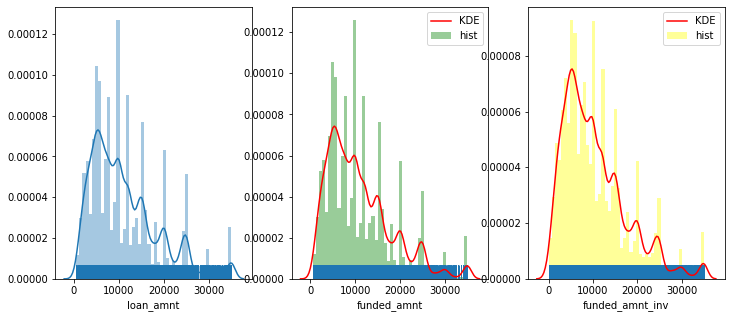

In [52]:
# visualization
fig,axes=plt.subplots(1,3,figsize=(12,5)) 
sns.distplot(new3["loan_amnt"],rug=True,ax=axes[0])
sns.distplot(new3["funded_amnt"],rug=True,
                     hist_kws={'color':'green','label':'hist'},
                     kde_kws={'color':'red','label':'KDE'},
                     ax=axes[1])
sns.distplot(new3["funded_amnt_inv"],rug=True,
                     hist_kws={'color':'yellow','label':'hist'},
                     kde_kws={'color':'red','label':'KDE'},
                     ax=axes[2])

In [53]:

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# self-defined VIF test
def VIFtest(df):
    """
    This function will use the package of statsmodels to perform the variance_inflation_factor, then return the
    result of VIF_value in the form of DataFrame
    Parameters
    ----------
    df: pandas.Dataframe
        data of features

    Returns
    ----------
    res: pandas.DataFrame
        data of the result of VIF test
    """
    # add the constant term
    # ---------------------
    # way 1
    X = add_constant(df)
    
    # way 2
    '''
    X = df[::]
    X["const"] = 1.0
    '''
    
    # way 3 patsy
    """
    features = "+".join(df.columns)
    y, X = dmatrices('df.columns[0] ~' + features, df, return_type='dataframe')
    """
    
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif.round(0)

VIFtest(new2.loc[:,["loan_amnt","funded_amnt","funded_amnt_inv"]])



,VIF Factor,features
0,3.0,const
1,27.0,loan_amnt
2,39.0,funded_amnt
3,12.0,funded_amnt_inv


In [54]:
# ["loan_amnt", "funded_amnt", "funded_amnt_inv"] these 3 attributes are similar, just choose 1.
new3 = new3.drop(["funded_amnt","funded_amnt_inv"],axis=1)

### feature : term

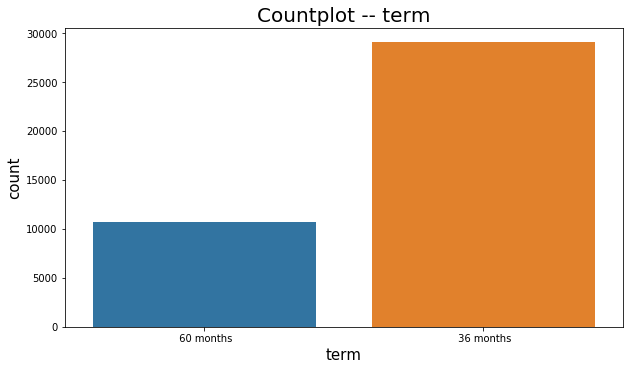

In [55]:
fig = plt.figure(figsize=(10,5.5))
ax = fig.add_subplot(111)
sns.countplot(new3["term"])
ax.set_title("Countplot -- term",size=20)
ax.set_ylabel("count",size = 15)
ax.set_xlabel("term",size = 15)
plt.show()
plt.close(fig)

### avoid including future information 
<br/>1.Interes rate is calculated based on the default probability and credit rank. Thus, we cannot get this information before we evaluate the credit risk. Thus, delete these two features.
<br/>2.Installment: The monthly payment owed by the borrower if the loan originates. This feature is determined by interest_rate and loan_amount. Thus ignore these attribute.
<br/>3.Grade and sub_grade are also calculated after the default probability. Those information are also future information. Delete these two features.
<br/>4.revol_bal,Total credit revolving balance!
<br/>5.revol_util, Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
<br/>6.total_pymnt,Payments received to date for total amount funded!
<br/>7.total_pymnt_inv,Payments received to date for portion of total amount funded by investors!
<br/>8.total_rec_prncp
<br/>9.total_rec_int
<br/>10.total_rec_late_fee
<br/>11.recoveries
<br/>12.collection_recovery_fee
<br/>13.last_pymnt_amnt
<br/>14.pub_rec_bankruptcies
<br/>15.'inq_last_6mths'


In [56]:
#new3["int_rate"] = (new3["int_rate"]-new3["int_rate"].min())/(new3["int_rate"].max()-new3["int_rate"].min())
#print(new3["int_rate"].describe())
#print(new3["installment"].describe())
#print(new3["grade"].describe())
#print(new3["sub_grade"].describe())
new3 = new3.drop(["int_rate", "installment","grade","sub_grade","revol_util","revol_bal",
                 "total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",
                 "collection_recovery_fee","recoveries","last_pymnt_amnt","pub_rec_bankruptcies"],axis=1)

In [57]:
new3 = new3.drop(["inq_last_6mths","pub_rec"],axis=1)

## deal with missing values
### emp_length ( fill the NA value with the method of "forward fill")
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
<br/> The missing value is less than 5% of the sample, so we propagate last valid observation forward to next 

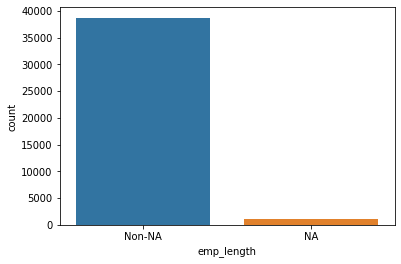

In [58]:
temp = new3["emp_length"].copy()
temp[temp.isnull()] ="NA"
temp[temp!="NA"] ="Non-NA"
sns.countplot(temp)


In [59]:
new3["emp_length"]=new3["emp_length"].fillna(method ='ffill')

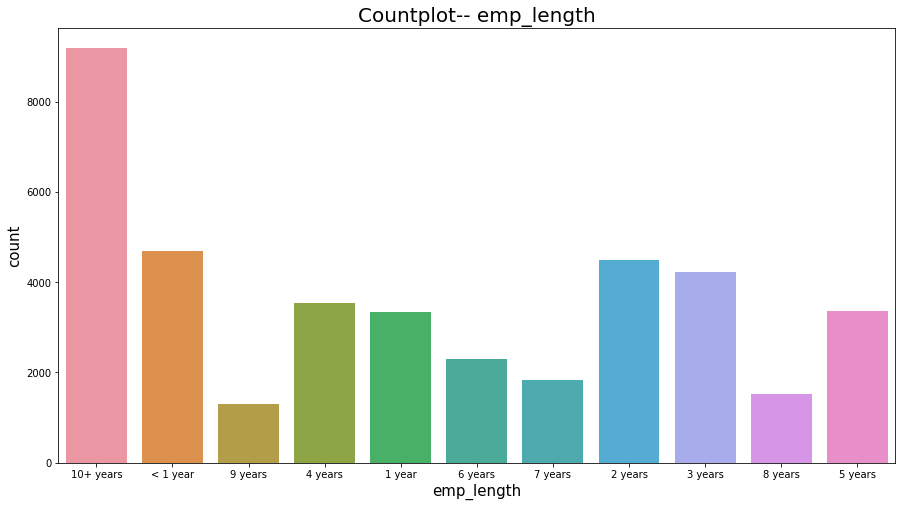

In [60]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

sns.countplot(new3["emp_length"])

ax.set_title("Countplot-- emp_length",size=20)
ax.set_ylabel("count",size = 15)
ax.set_xlabel("emp_length",size = 15)

plt.show()
plt.close(fig)


### home_ownership
The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

count     39786
unique        5
top        RENT
freq      18918
Name: home_ownership, dtype: object


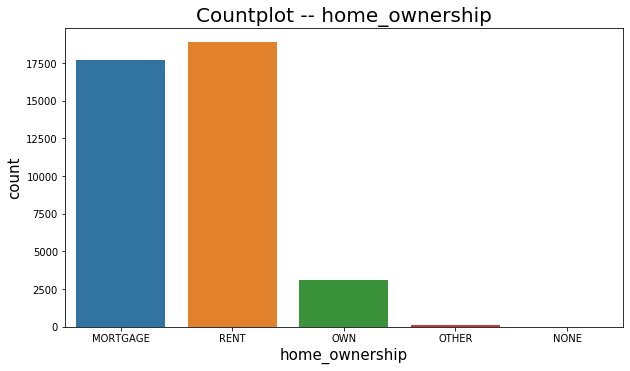

In [61]:
print(new3["home_ownership"].describe())
fig = plt.figure(figsize=(10,5.5))
ax = fig.add_subplot(111)
sns.countplot(new3["home_ownership"])
ax.set_title("Countplot -- home_ownership",size=20)
ax.set_ylabel("count",size = 15)
ax.set_xlabel("home_ownership",size = 15)
plt.show()
plt.close(fig)


### annual_inc
The self-reported annual income provided by the borrower during registration.

count    3.978600e+04
mean     6.897907e+04
std      6.376263e+04
min      4.000000e+03
25%      4.050000e+04
50%      5.900000e+04
75%      8.234250e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


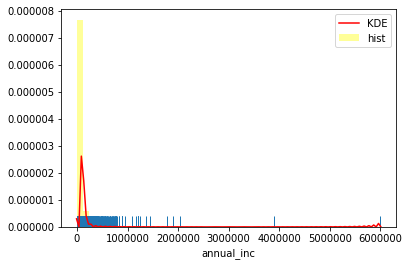

In [62]:
print(new3["annual_inc"].describe())
sns.distplot(new3["annual_inc"],rug=True,
                     hist_kws={'color':'yellow','label':'hist'},
                     kde_kws={'color':'red','label':'KDE'})

### verification_status
Indicates if income was verified by LC, not verified, or if the income source was verified

count            39786
unique               3
top       Not Verified
freq             16926
Name: verification_status, dtype: object


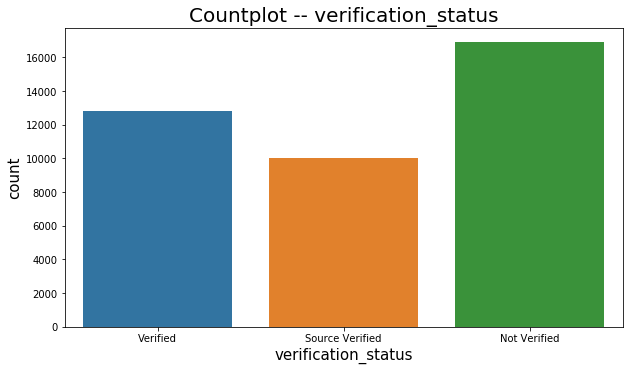

In [63]:
print(new3["verification_status"].describe())
fig = plt.figure(figsize=(10,5.5))
ax = fig.add_subplot(111)
sns.countplot(new3["verification_status"])
ax.set_title("Countplot -- verification_status",size=20)
ax.set_ylabel("count",size = 15)
ax.set_xlabel("verification_status",size = 15)
plt.show()
plt.close(fig)


### delete all the date attribute: ["issue_d","earliest_cr_line","last_pymnt_d","last_credit_pull_d"]
Date are not useful in the classification

In [64]:
new3 = new3.drop(["issue_d","earliest_cr_line","last_pymnt_d","last_credit_pull_d"],axis=1)

### Purpose
A category provided by the borrower for the loan request. 

count                  39786
unique                    14
top       debt_consolidation
freq                   18676
Name: purpose, dtype: object


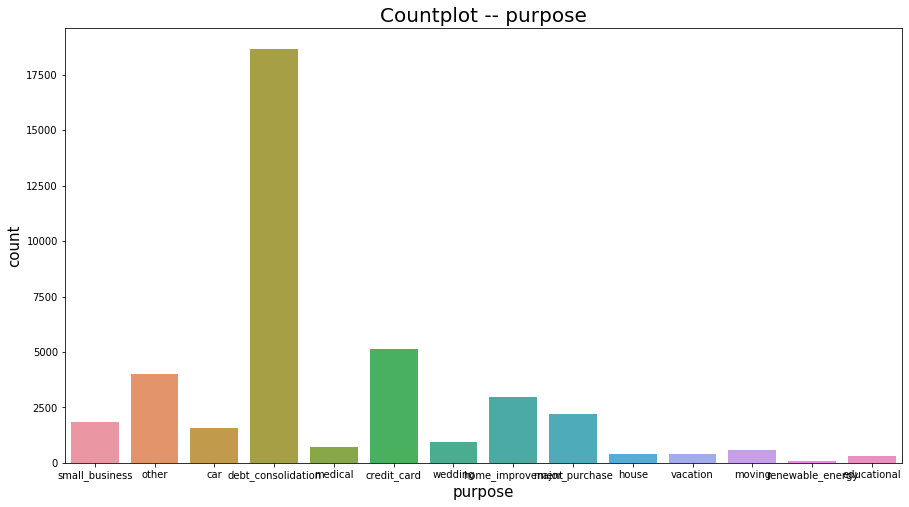

In [65]:
print(new3["purpose"].describe())
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
sns.countplot(new3["purpose"])
ax.set_title("Countplot -- purpose",size=20)
ax.set_ylabel("count",size = 15)
ax.set_xlabel("purpose",size = 15)
plt.show()
plt.close(fig)

### title
The loan title provided by the borrower.There is no standardized label. Duplicated labels exist, like:
1. "Debt Consolidation","Debt Consolidation Loan","Debt consolidation","Consolidation", "consolidation"
2. "Personal", "personal", "personal loan","loan"

In [66]:
# count the frequency of "title"
new3.loc[:,["title"]].apply(pd.value_counts)
new3 = new3.drop(["title",],axis=1)

# > 90% similarity
#new3.loc[:,["pub_rec"]].apply(pd.value_counts)
#new3 = new3.drop(["pub_rec",],axis=1)

new3.shape

(39786, 15)

### zip_code & addr_state: those two attributes contain similar infomation, so just keep one

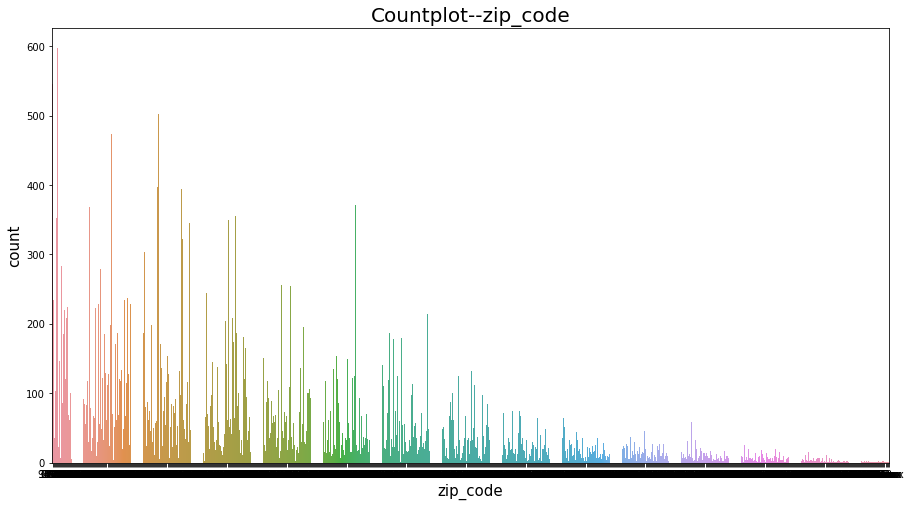

count     39786
unique      823
top       100xx
freq        597
Name: zip_code, dtype: object


In [68]:
# visualization 
temp = new3["zip_code"]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
sns.countplot(temp)

ax.set_title("Countplot--zip_code",size=20)
ax.set_ylabel("count",size = 15)
ax.set_xlabel("zip_code",size = 15)

plt.show()
plt.close(fig)
print(new3["zip_code"].describe())

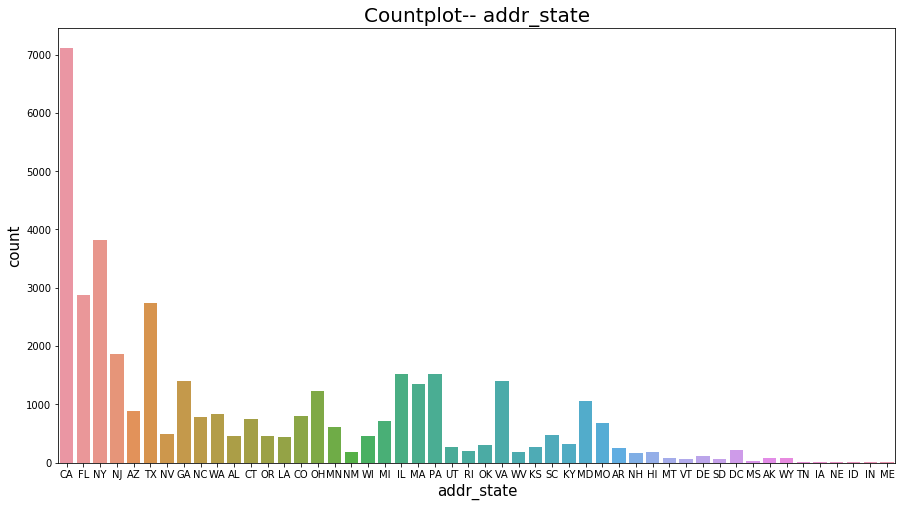

In [69]:
# visualization 
temp = new3["addr_state"]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
sns.countplot(temp)

ax.set_title("Countplot-- addr_state",size=20)
ax.set_ylabel("count",size = 15)
ax.set_xlabel("addr_state",size = 15)

plt.show()
plt.close(fig)

In [70]:
# drop zip_code 
new3 = new3.drop(["zip_code",],axis=1)

### dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

count    39786.000000
mean        13.317794
std          6.678300
min          0.000000
25%          8.180000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


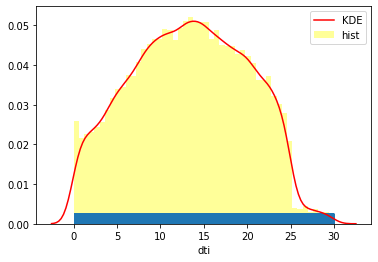

In [71]:
print(new3["dti"].describe())
sns.distplot(new3["dti"],rug=True,
                     hist_kws={'color':'yellow','label':'hist'},
                     kde_kws={'color':'red','label':'KDE'})

### total_acc & open_acc (only keep one)
The total number of credit lines currently in the borrower's credit file

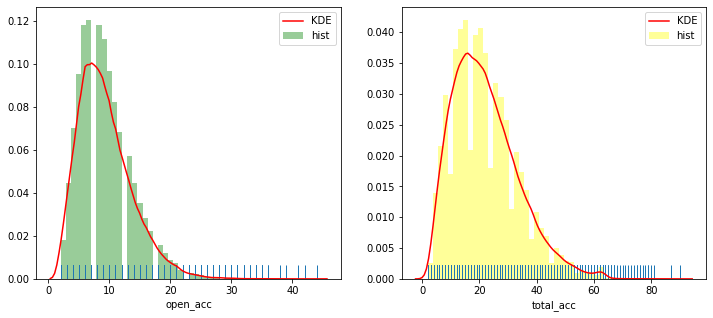

In [72]:
new3["total_acc"].describe()
new3["open_acc"].describe()

# visualization
fig,axes=plt.subplots(1,2,figsize=(12,5)) 

sns.distplot(new3["open_acc"],rug=True,
                     hist_kws={'color':'green','label':'hist'},
                     kde_kws={'color':'red','label':'KDE'},
                     ax=axes[0])
sns.distplot(new3["total_acc"],rug=True,
                     hist_kws={'color':'yellow','label':'hist'},
                     kde_kws={'color':'red','label':'KDE'},
                     ax=axes[1])




In [73]:
new3 = new3.drop(["total_acc"],axis=1)

## 'delinq_2yrs'

In [76]:
print(new3['delinq_2yrs'].describe())


count    39786.000000
mean         0.146534
std          0.491826
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


## missing_amnt

In [78]:
print(new3['missing_amnt'].describe())


count    39786.000000
mean         0.051802
std          0.252883
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: missing_amnt, dtype: float64


In [79]:
print(new3.shape)
freeze_header(new3)
new3.to_csv(path+"data.csv",index=False)

(39786, 13)


interactive(children=(IntSlider(value=1000, description='rows', max=39786, min=1000, readout=False, step=1000)…

In [80]:
new3.columns

Index(['loan_amnt', 'term', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'open_acc', 'missing_amnt'],
      dtype='object')

,loan_amnt,annual_inc,loan_status,dti
0,1.000000,0.017678,Charged Off,0.035345
1,0.260870,0.008339,Fully Paid,0.589863
2,0.095652,0.007171,Charged Off,0.750917
3,0.344928,0.010174,Charged Off,0.208736
4,0.101449,0.006838,Charged Off,0.245749


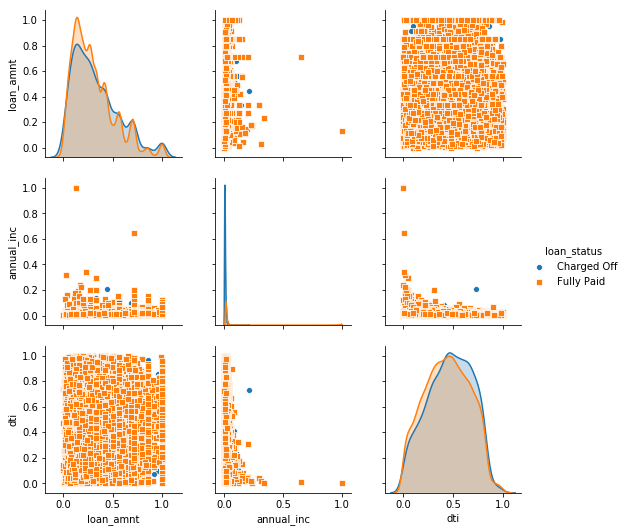

In [251]:
'''
da = pd.read_csv(path+"data.csv")
da = da.iloc[:,[1,5,7,10]]
da["loan_amnt"] = (da["loan_amnt"]-da['loan_amnt'].min())/(da['loan_amnt'].max()-da["loan_amnt"].min())
da["annual_inc"] = (da["annual_inc"]-da['annual_inc'].min())/(da['annual_inc'].max()-da["annual_inc"].min())
da["dti"] = (da["dti"]-da['dti'].min())/(da['dti'].max()-da["dti"].min())
sns.pairplot(da, hue="loan_status",markers=["o", "s"])
da.head()
'''

# Scaling
## Normalization of numerical attributes

In [81]:
new3=pd.read_csv(path+"data.csv")
# normalization
new3["loan_amnt"] = (new3["loan_amnt"] - new3["loan_amnt"].min())/(new3["loan_amnt"].max()-new3["loan_amnt"].min())
new3["annual_inc"] = (new3["annual_inc"] - new3["annual_inc"].min())/(new3["annual_inc"].max()-new3["annual_inc"].min())
new3["dti"] = (new3["dti"] - new3["dti"].min())/(new3["dti"].max()-new3["dti"].min())
new3["open_acc"] = (new3["open_acc"] - new3["open_acc"].min())/(new3["open_acc"].max()-new3["open_acc"].min())
new3["delinq_2yrs"] = (new3["delinq_2yrs"] - new3["delinq_2yrs"].min())/(new3["delinq_2yrs"].max()-new3["delinq_2yrs"].min())
new3["missing_amnt"] = (new3["missing_amnt"] - new3["missing_amnt"].min())/(new3["missing_amnt"].max()-new3["missing_amnt"].min())

In [82]:
freeze_header(new3)
new3.shape

interactive(children=(IntSlider(value=1000, description='rows', max=39786, min=1000, readout=False, step=1000)…

(39786, 13)

## convert categorical variable into dummy variable

In [ ]:
# get_dummies
d1=pd.get_dummies(new3["term"])
d2=pd.get_dummies(new3["emp_length"])
d3=pd.get_dummies(new3["home_ownership"])
d4=pd.get_dummies(new3["verification_status"])
d5=pd.get_dummies(new3["purpose"])
d6=pd.get_dummies(new3["addr_state"])
new3.drop(['term', 'emp_length', 'home_ownership','verification_status','purpose', 'addr_state'],axis=1,inplace = True)
new3 = pd.concat([new3,d1,d2,d3,d4,d5,d6],axis=1)
new3.to_csv(path+"final_clean_set.csv",index = False)

# alternative algo: labelencoder

'''
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()
 
y = data['class']    #用列名访问更直观
X = data.drop('class', axis = 1)
'''
# alternative algo: one hot encoder （同时需要降维） 一般不用再tree model
# https://www.cnblogs.com/king-lps/p/7846414.html



In [85]:
new4= pd.read_csv(path+"final_clean_set.csv")
freeze_header(new4)

interactive(children=(IntSlider(value=1000, description='rows', max=39786, min=1000, readout=False, step=1000)…

# 5.Split sample set into training set and test set-- 9:1

In [86]:
from sklearn.model_selection import train_test_split
Y = new4.loc[:,"loan_status"]
X = new4.drop(["loan_status"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 190003956)


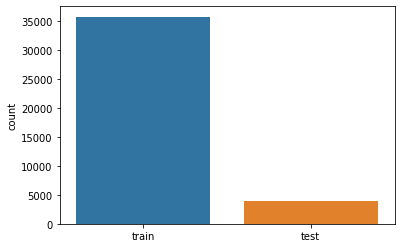

In [87]:
L=["train"]*X_train.shape[0]+["test"]*X_test.shape[0]
sns.countplot(L)

# 6,7,9. Data Mining

## Decision Tree
create model, train model and test it.

In [88]:
from sklearn.tree import DecisionTreeClassifier 
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
# gridesearchCV
from  sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [90]:
'''
https://blog.csdn.net/evolution23/article/details/85235397
criterion: "gini" --- CART, "entropy" --- ID3, C4.5
splitter: "best" --- small dataset, "random" --- large dataset
max_depth(树的深度)
max_leaf_nodes(节点树木)
max_features(最大特征数)
min_samples_leaf(叶子结点的最小样本数)
min_sample_split(中间节点的最小样本数)
min_weight_fraction_leaf(叶子夜店的样本权重占总权重的比例)
min_impurity_split(最小不纯净度)
'''

# Create Decision Tree classifer object
Tree = DecisionTreeClassifier()

Max_depth = range(5,15,1)
Min_sample_leaf = range(1,10,2)
tuned_paramters = dict(max_depth = Max_depth, min_samples_leaf = Min_sample_leaf)

# Train Decision Tree Classifer
DD = GridSearchCV(Tree, tuned_paramters, cv = 10)
clf = DD.fit(X_train,y_train)

# tuning hyper-parameters

Best: 0.856453 using {'max_depth': 5, 'min_samples_leaf': 5}
The AUC of GridSearchCV Desicion Tree is 0.4998540572095738


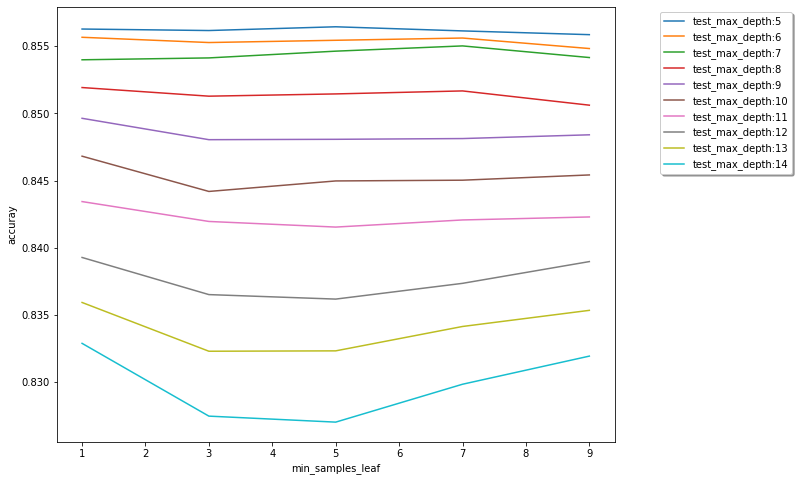

In [91]:

print("Best: %f using %s" % (DD.best_score_, DD.best_params_))
 
y_prob = DD.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
#DD.score(X_test, y_pred)
 
print('The AUC of GridSearchCV Desicion Tree is', roc_auc_score(y_test,y_pred))

#DD.grid_scores_
 
test_means = DD.cv_results_[ 'mean_test_score' ]
#test_stds = DD.cv_results_[ 'std_test_score' ]
#pd.DataFrame(DD.cv_results_).to_csv('DD_min_samples_leaf_maxdepth.csv')
 
# plot results
test_scores = np.array(test_means).reshape(len(Max_depth), len(Min_sample_leaf))
 
fig = plt.figure(figsize=(10,8))
for i, value in enumerate(Max_depth):
    plt.plot(Min_sample_leaf, test_scores[i], label= 'test_max_depth:'   + str(value))
 
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xlabel( 'min_samples_leaf' )                                                                                                      
plt.ylabel( 'accuray' )
plt.show()



# evaluate and test prediction accuracy

In [93]:
# Create Decision Tree classifer object
Tree_res = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
Tree_res = Tree_res.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = Tree_res.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7567227946720282


# plot the confusion matrix

Accuracy: 0.7567227946720282
[[2904  522]
 [ 446  107]]


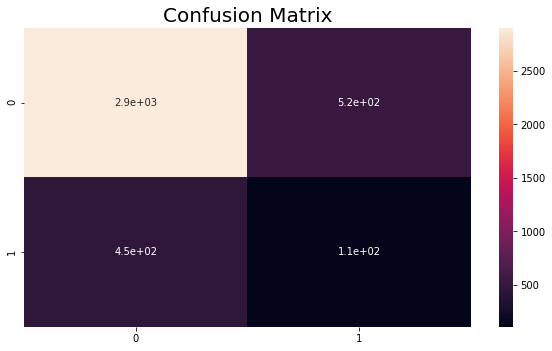

In [94]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test, y_pred, labels=["Fully Paid","Charged Off"])

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(conf_matrix)
fig = plt.figure(figsize=(10,5.5))
ax = fig.add_subplot(111)

sns.heatmap(conf_matrix, annot=True)
ax.set_title("Confusion Matrix",size=20)


plt.show()
plt.close(fig)

### visualization of tree

In [96]:
"""
from sklearn import tree
#After training，use export_graphviz to export the Tree into Graphviz format
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

import pydotplus
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris_2.pdf')


Feature = new4.columns
target = ["Charged Off","Fully Paid"]
from IPython.display import Image  
dot_data = tree.export_graphviz(clf) 
                                #out_file=None, 
                         #feature_names=new4.columns,
                         #class_names=target,
                         #filled=True, rounded=True,
                         #special_characters = True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  
"""

'\nfrom sklearn import tree\n#After training，use export_graphviz to export the Tree into Graphviz format\nwith open("iris.dot", \'w\') as f:\n    f = tree.export_graphviz(clf, out_file=f)\n\nimport pydotplus\ndot_data=tree.export_graphviz(clf,out_file=None)\ngraph=pydotplus.graph_from_dot_data(dot_data)\ngraph.write_pdf(\'iris_2.pdf\')\n\n\nFeature = new4.columns\ntarget = ["Charged Off","Fully Paid"]\nfrom IPython.display import Image  \ndot_data = tree.export_graphviz(clf) \n                                #out_file=None, \n                         #feature_names=new4.columns,\n                         #class_names=target,\n                         #filled=True, rounded=True,\n                         #special_characters = True)  \ngraph = pydotplus.graph_from_dot_data(dot_data)  \nImage(graph.create_png())  \n'

In [97]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7612465443578789


In [102]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



### use iris dataset to plot the decision tree

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris 

#载入sklearn中自带的数据Iris，构造决策树

iris=load_iris()
clf=tree.DecisionTreeClassifier()
clf=clf.fit(iris.data,iris.target)
from sklearn import tree
#After training，use export_graphviz to export the Tree into Graphviz format
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

import pydotplus
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris_2.pdf')

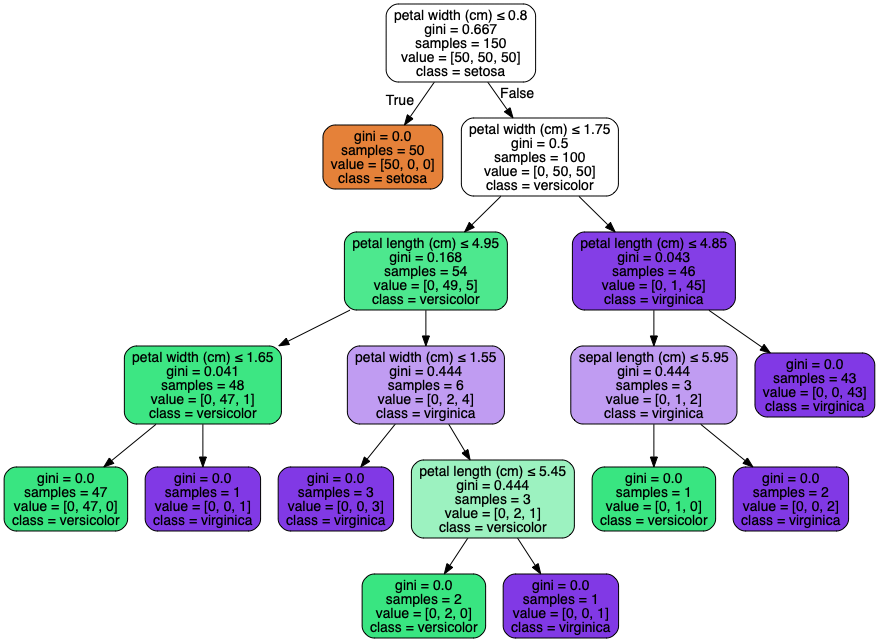

In [69]:
import pydotplus
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris_2.pdf')
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

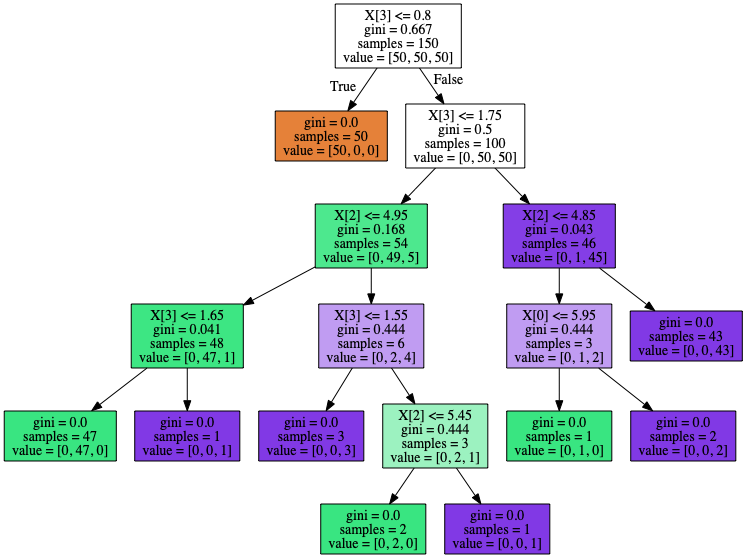

In [70]:
dot_data = tree.export_graphviz(clf, out_file = None,filled=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

## Support Vector Machine
create model and train the model

In [8]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


test the model, because the SVM model takes forever to fit just one time. So we eliminate the auto-tunning hyper parameter part.

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_linear = SVC(C=1.0, kernel="linear", gamma="auto" )
svm_poly = SVC(C=1.0, kernel="poly", degree=3, gamma="auto")
svm_rbf = SVC(C=1.0, kernel="rbf", gamma=0.5)

svms = [svm_linear, svm_poly, svm_rbf]

for svm, i in zip(svms, range(len(svms))):
    svm.fit(X_train, y_train)
    predicted_svm = svm.predict(X_test)
    acc_svm = (accuracy_score(X_test, predicted_svm))
    print ("Accuracy: \t", acc_svm)

Accuracy: 0.8595124403116361


## Random Forest
create model and train the model

In [104]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [105]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
name = X.columns

Accuracy: 0.8607690374465946


In [106]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

# tunning hyper parameter

In [108]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score
for n_estimator in range(1, 300, 15):
    rf = rfc(n_estimators=n_estimator)
    rf.fit(X_train, y_train)
    predicted_rf = rf.predict(X_test)
    acc_rf = (accuracy_score(y_test, predicted_rf))
    print ("Accuracy: with estimator =\t ", n_estimator, "\t", acc_rf)

Accuracy: with estimator =	  1 	 0.7549635586830862
Accuracy: with estimator =	  16 	 0.8534807740638352
Accuracy: with estimator =	  31 	 0.8590098014576527
Accuracy: with estimator =	  46 	 0.8592611208846443
Accuracy: with estimator =	  61 	 0.8595124403116361
Accuracy: with estimator =	  76 	 0.8590098014576527
Accuracy: with estimator =	  91 	 0.8605177180196029
Accuracy: with estimator =	  106 	 0.8610203568735864
Accuracy: with estimator =	  121 	 0.8615229957275697
Accuracy: with estimator =	  136 	 0.8615229957275697
Accuracy: with estimator =	  151 	 0.8605177180196029
Accuracy: with estimator =	  166 	 0.861271676300578
Accuracy: with estimator =	  181 	 0.8607690374465946
Accuracy: with estimator =	  196 	 0.8600150791656195
Accuracy: with estimator =	  211 	 0.8600150791656195
Accuracy: with estimator =	  226 	 0.8602663985926112
Accuracy: with estimator =	  241 	 0.861271676300578
Accuracy: with estimator =	  256 	 0.861271676300578
Accuracy: with estimator =	  271 	 0.86

No handles with labels found to put in legend.


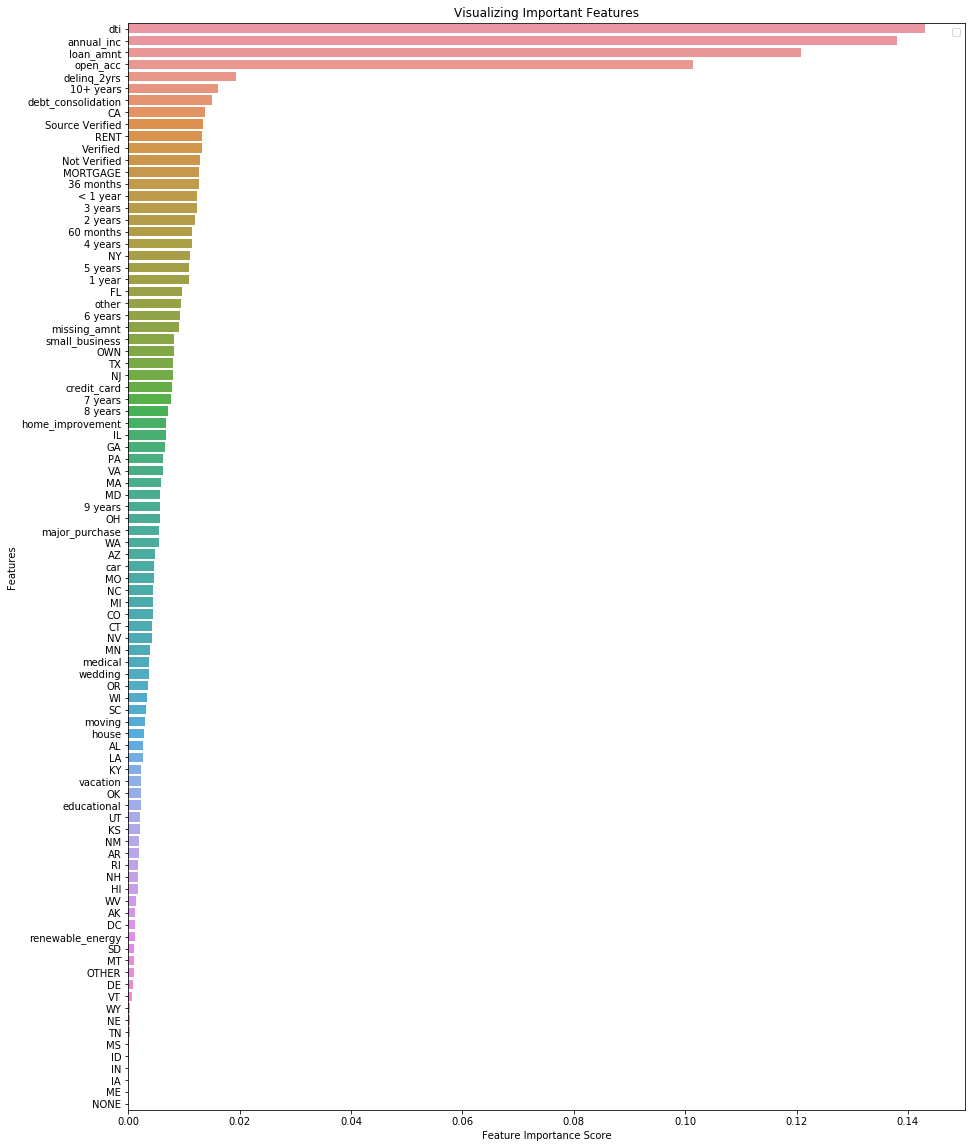

In [109]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=name).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
fig = plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Accuracy: 0.8607690374465946
[[3424    2]
 [ 552    1]]


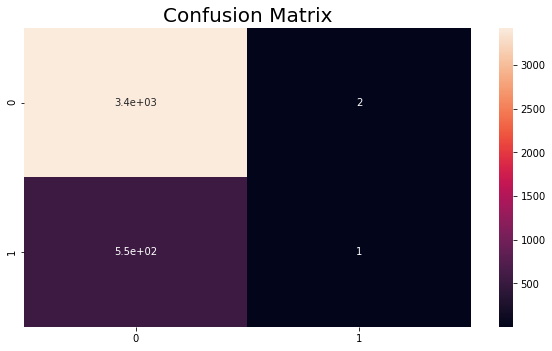

In [110]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test, y_pred, labels=["Fully Paid","Charged Off"])

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(conf_matrix)
fig = plt.figure(figsize=(10,5.5))
ax = fig.add_subplot(111)

sns.heatmap(conf_matrix, annot=True)
ax.set_title("Confusion Matrix",size=20)


plt.show()
plt.close(fig)

## KNN

create model and train the model

In [111]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict Output
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8180447348580046


# tuning hyper-parameter

In [112]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import accuracy_score
for k in range(1,10):
    for p in range(1,5):
        knn=knc(n_neighbors=k, weights="distance", p=p)
        knn.fit(X_train, y_train)
        predicted_knn = knn.predict(X_test)
        acc_knn = (accuracy_score(y_test, predicted_knn))
        print ("Accuracy: with k = ", k, "  and p value in Minkowski distance = ", p, "\t", acc_knn)

Accuracy: with k =  1   and p value in Minkowski distance =  1 	 0.7657702940437295
Accuracy: with k =  1   and p value in Minkowski distance =  2 	 0.7670268911786882
Accuracy: with k =  1   and p value in Minkowski distance =  3 	 0.7675295300326715
Accuracy: with k =  1   and p value in Minkowski distance =  4 	 0.7690374465946218
Accuracy: with k =  2   and p value in Minkowski distance =  1 	 0.7657702940437295
Accuracy: with k =  2   and p value in Minkowski distance =  2 	 0.7670268911786882
Accuracy: with k =  2   and p value in Minkowski distance =  3 	 0.7675295300326715
Accuracy: with k =  2   and p value in Minkowski distance =  4 	 0.7690374465946218
Accuracy: with k =  3   and p value in Minkowski distance =  1 	 0.7956773058557427
Accuracy: with k =  3   and p value in Minkowski distance =  2 	 0.7974365418446846
Accuracy: with k =  3   and p value in Minkowski distance =  3 	 0.7991957778336265
Accuracy: with k =  3   and p value in Minkowski distance =  4 	 0.800201055

In [90]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import accuracy_score
for k in range(1,10):
    for p in range(1,5):
        knn=knc(n_neighbors=k, weights="distance", p=p)
        knn.fit(X_train, y_train)
        predicted_knn = knn.predict(X_test)
        acc_knn = (accuracy_score(y_test, predicted_knn))
        print ("Accuracy: with k = ", k, "  and p value in Minkowski distance = ", p, "\t", acc_knn)

Accuracy: with k =  1   and p value in Minkowski distance =  1 	 0.7657702940437295
Accuracy: with k =  1   and p value in Minkowski distance =  2 	 0.7670268911786882
Accuracy: with k =  1   and p value in Minkowski distance =  3 	 0.7675295300326715
Accuracy: with k =  1   and p value in Minkowski distance =  4 	 0.7690374465946218
Accuracy: with k =  2   and p value in Minkowski distance =  1 	 0.7657702940437295
Accuracy: with k =  2   and p value in Minkowski distance =  2 	 0.7670268911786882
Accuracy: with k =  2   and p value in Minkowski distance =  3 	 0.7675295300326715
Accuracy: with k =  2   and p value in Minkowski distance =  4 	 0.7690374465946218
Accuracy: with k =  3   and p value in Minkowski distance =  1 	 0.7956773058557427
Accuracy: with k =  3   and p value in Minkowski distance =  2 	 0.7974365418446846
Accuracy: with k =  3   and p value in Minkowski distance =  3 	 0.7991957778336265
Accuracy: with k =  3   and p value in Minkowski distance =  4 	 0.800201055

# evaluation part and comparation between different models

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Dec  9 20:39:33 2019

@author: peng_kaiwen
"""

#importing libraries
import numpy as np
import pandas as pd
from matplotlib import cm

#loading the dataset
dataset = pd.read_csv('dataset-4.csv')
#X = dataset.iloc[:,0:6].values
X = dataset.iloc[:,0:3].values
y = dataset.iloc[:,len(dataset.iloc[0])-1].values

#train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#fitting the classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)


import matplotlib.pyplot as plt
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)

    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index('index', drop=True)

    print(y_cap_df_s.head(20))

    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0

    percent = 0.5
    row_index = np.trunc(num_count * percent)

    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)

    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)

    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    #ar_label = 'ar value = %s' % ar_value
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    #ax.scatter(xx,yy, color='red')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()
    
    
y_pred_proba = classifier.predict_proba(X=X_test)
capcurve(y_values=y_test, y_preds_proba=y_pred_proba[:,1])
